<a href="https://colab.research.google.com/github/popolome/Trying-out-Stable-Diffusion-XL-for-Image-Gen/blob/main/Trying_out_Stable_Diffusion_XL_for_Image_Gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies


In [1]:
!pip install -q diffusers transformers accelerate safetensors torch torchvision

# Load SDXL Base + VAE FP16 Fix

In [2]:
import torch
from diffusers import StableDiffusionXLPipeline, AutoencoderKL

model_id = "stabilityai/stable-diffusion-xl-base-1.0"

vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix",
    torch_dtype=torch.float16
)

pipe = StableDiffusionXLPipeline.from_pretrained(
    model_id,
    vae=vae,
    dtype=torch.float16,
    variant='fp16',
    use_safetensors=True,
)

pipe = pipe.to('cuda')

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'dtype': torch.float16} are not expected by StableDiffusionXLPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# Generate Image

  0%|          | 0/30 [00:00<?, ?it/s]

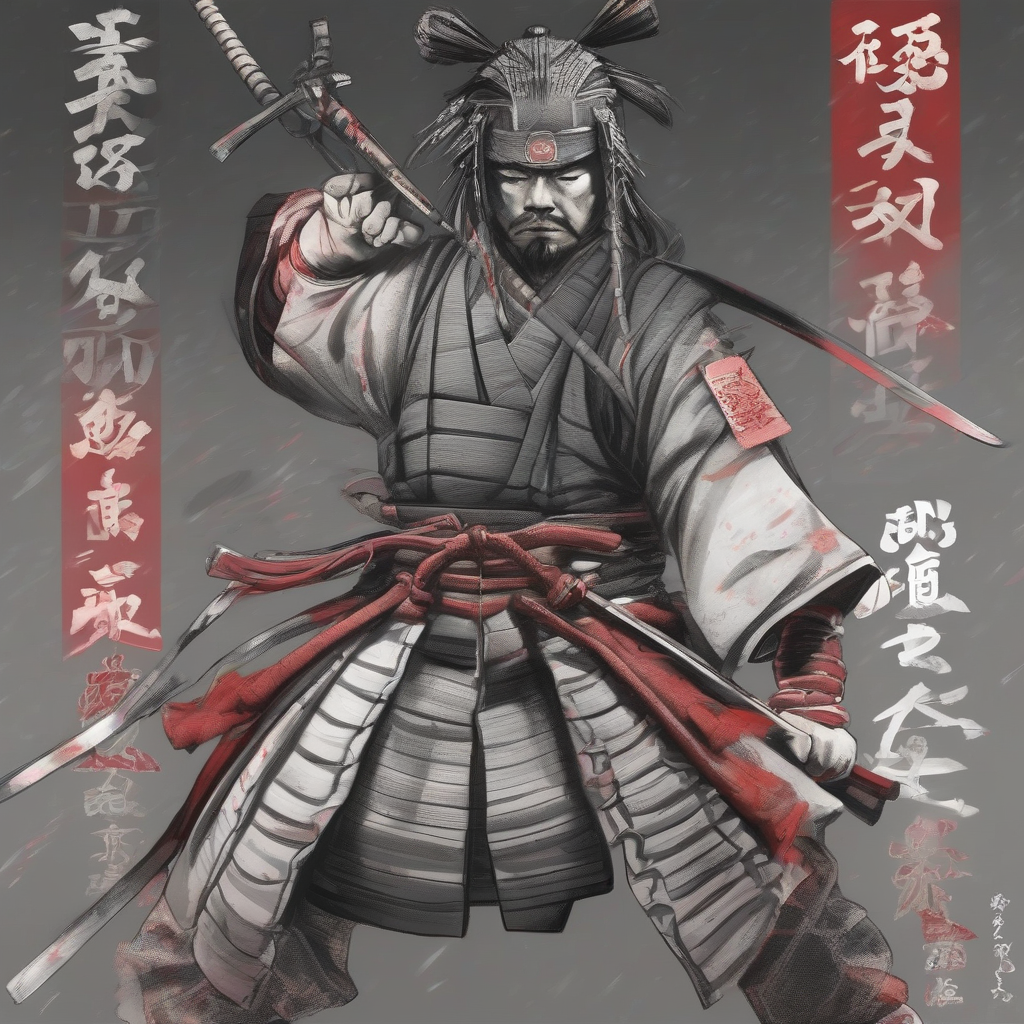

In [34]:
from PIL.Image import Image
prompt = "A japanese man samurai-looking fiercely at the camera, hyper realistic, fighting happening behind him but blurred, upper-body photoshot, **photorealistic, 8k, detailed skin, shallow depth of field**"

pipe = pipe.to(dtype=torch.float16)

image = pipe(
    prompt,
    num_inference_steps=30,
    guidance_scale=4.5
).images[0]

image.save("western_samurai_man_15.png")
display(image)